## V61 HeNe-Laser


In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

### Stabilität

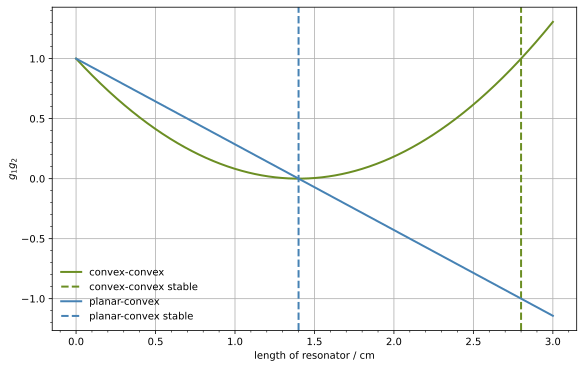

In [2]:
xx = np.linspace(0,3,1000)
R = 1.4

plt.plot(xx, (1-xx/R)**2, color='olivedrab', linewidth = 2, label = 'convex-convex')
plt.axvline(2*R, color='olivedrab', linestyle='--', linewidth=2, label = 'convex-convex stable')

plt.plot(xx, (1-xx/R), color='steelblue', linewidth = 2, label = 'planar-convex')
plt.axvline(R, color='steelblue', linestyle='--', linewidth=2, label = 'planar-convex stable')

plt.xlabel(r'length of resonator / cm')
plt.ylabel(r'$g_1g_2$')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

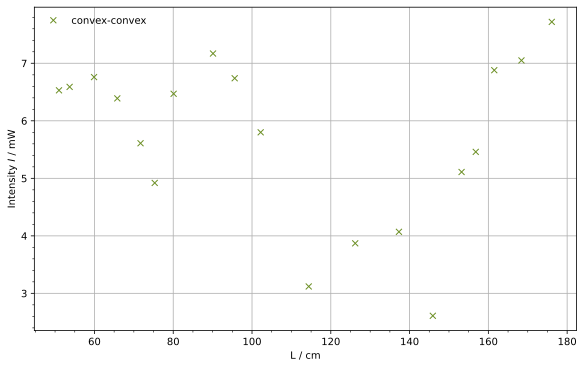

In [3]:
x, I = np.genfromtxt('data/konkavstab.txt', unpack=True)

plt.plot(x+1.6, I, color='olivedrab', marker='x' , linestyle='None', label = 'convex-convex')

# x, I = np.genfromtxt('data/planstab.txt', unpack=True, skip_header=1)

# plt.plot(x+1.6, I, color='steelblue', marker='x', linestyle='None', label = 'planar-convex')
'''
weiß nicht ob beide in einem plot besser, 3 messwerte in einem ist schon armselig
''' 

plt.xlabel(r'L / cm')
plt.ylabel(r'Intensity $I$ / mW')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

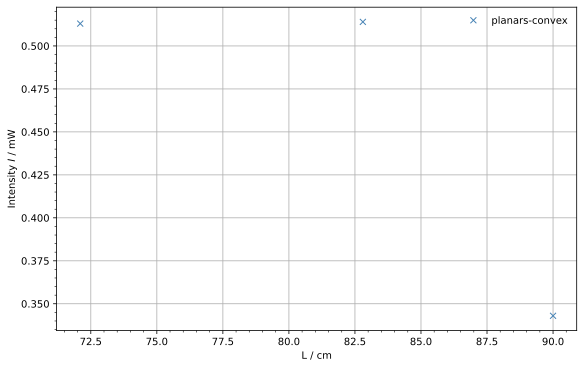

In [4]:
x, I = np.genfromtxt('data/planstab.txt', unpack=True)

plt.plot(x+1.6, I, color='steelblue', marker='x', linestyle='None', label = 'planars-convex')

plt.xlabel(r'L / cm')
plt.ylabel(r'Intensity $I$ / mW')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

### Polarisation

I_0 = 4.140+/-0.032
alpha = 1.133+/-0.004
c = -0.003+/-0.018


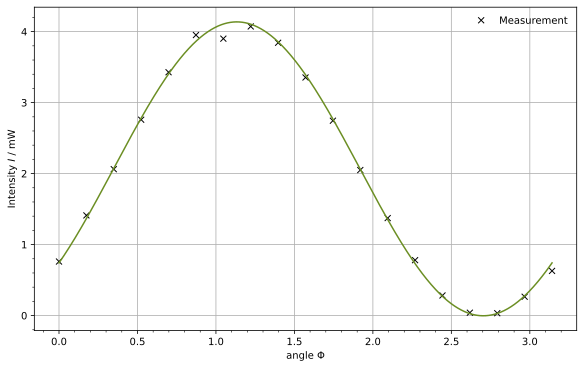

In [5]:
a, I = np.genfromtxt('data/polarisation.txt', unpack=True)

plt.plot(a*np.pi/180, I,'kx', linestyle='None', label = 'Measurement')

def cos(phi, I, alpha, c):
    return I*np.cos(phi-alpha)**2+c

mask = a != 60
a = a[mask]
I =I[mask]

par, cov = fit(cos, a*np.pi/180, I)
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(f'I_0 =', upar[0])
print(f'alpha =', upar[1])
print(f'c =', upar[2])

xx = np.linspace(0, np.pi, 1000 )
plt.plot(xx, cos(xx, *noms(upar)), color='olivedrab')


plt.xlabel(r'angle $\Phi$')
plt.ylabel(r'Intensity $I$ / mW')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

### TEM (FIT FÜR LETZTE BEIDE FEHLT)

Parameter (= Freiheitsgrade) für:
- Maximum
- x-Verschiebung
- (y-Verschiebung) --> zu viele Freiheitsgrade? schlechte Asymptote...
- Breite
- Asymmetrie


I_0 = 6.253+/-0.118
m = 10.276+/-0.099
s = 4.529+/-0.099


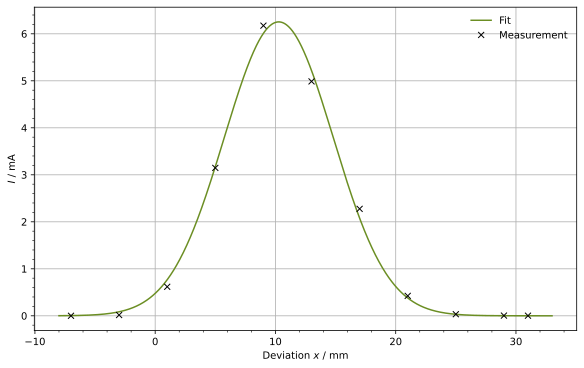

In [6]:
x,I = np.genfromtxt('data/TEM00.txt', unpack=True)#, skip_header=1)


#def gauss(x, I, b, m, s):
def gauss(x, I, m, s):
    return I * np.e**(- (x - m)**2 / (2 * s**2))# + b

#par, cov = fit(gauss, x, I**2)#, p0=[1.0, 0.0, 0.0, 0.1])
#par, cov = fit(gauss, x, I, p0=[6, 0, 10, 1])
par, cov = fit(gauss, x, I, p0=[6, 10, 5])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(f'I_0 = {upar[0]:.3f}')
#print(f'b = {upar[1]:.3f}')
print(f'm = {upar[1]:.3f}')
print(f's = {upar[2]:.3f}')

xx = np.linspace(-8,33, 1000)
plt.plot(xx, gauss(xx, *noms(upar)), color='olivedrab', label = 'Fit')

#plt.plot(x, I**2, 'kx', linestyle='None', label = 'Measurement')

plt.plot(x, I, 'kx', linestyle='None', label = 'Measurement')

plt.xlabel(r'Deviation $x$ / mm')
plt.ylabel(r'$I$ / mA')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

I_0 = 3.568+/-0.236
m = 10.483+/-0.264
s = 8.480+/-0.335
l = 9.830+/-0.262


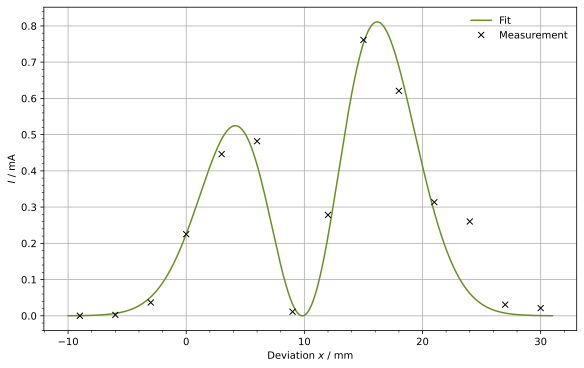

In [7]:
x,I = np.genfromtxt('data/TEM01.txt', unpack=True)#, skip_header=1)


#def gauss(x, I, b, m, s, l):
def gauss(x, I, m, s, l):
    return I * ((x-l)/s)**2 * np.e**(- 2*(x - m)**2 / (s**2))# + b

#par, cov = fit(gauss, x, I**2) #, p0=[.09, 0.0, -.45,0.1, 0.1])
#par, cov = fit(gauss, x[:-3], I[:-3], p0=[5, 0, 10, 7, 9])
par, cov = fit(gauss, x, I, p0=[5, 10, 7, 9])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(f'I_0 = {upar[0]:.3f}')
#print(f'b = {upar[1]:.3f}')
print(f'm = {upar[1]:.3f}')
print(f's = {upar[2]:.3f}')
print(f'l = {upar[3]:.3f}')

xx = np.linspace(-10,31, 1000)
plt.plot(xx, gauss(xx, *noms(upar)), color='olivedrab', label = 'Fit')

#plt.plot(x, I**2, 'kx', linestyle='None', label = 'Measurement')
plt.plot(x, I, 'kx', linestyle='None', label = 'Measurement')

plt.xlabel(r'Deviation $x$ / mm')
plt.ylabel(r'$I$ / mA')
plt.legend()
plt.grid(True)
plt.show()
plt.close()



I_0 = 0.176+/-0.009
m = 9.266+/-0.190
s = 9.082+/-0.184
l = 8.511+/-0.181


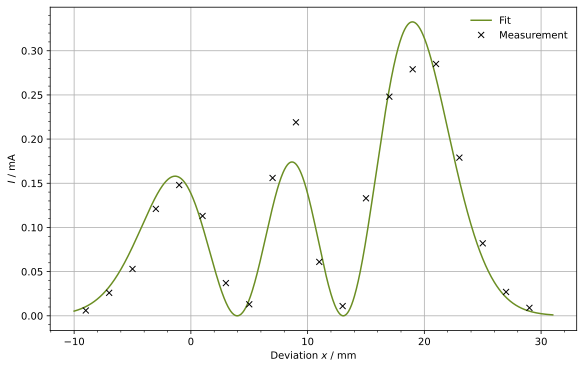

In [8]:
x,I = np.genfromtxt('data/TEM02.txt', unpack=True)#, skip_header=1)


#def gauss(x, I, b, m, s, l):
def gauss(x, I, m, s, l):
    return I * (4*((x-l)/s)**2-1)**2 * np.e**(- 2*(x - m)**2 / (s**2))# + b

#par, cov = fit(gauss, x, I**2) #, p0=[.09, 0.0, -.45,0.1, 0.1])
par, cov = fit(gauss, x, I, p0=[1, 10, 8, 9])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

#print(upar)
print(f'I_0 = {upar[0]:.3f}')
print(f'm = {upar[1]:.3f}')
print(f's = {upar[2]:.3f}')
print(f'l = {upar[3]:.3f}')


xx = np.linspace(-10,31, 1000)
plt.plot(xx, gauss(xx, *noms(upar)), color='olivedrab', label = 'Fit')

plt.plot(x, I, 'kx', linestyle='None', label = 'Measurement')

plt.xlabel(r'Deviation $x$ / mm')
plt.ylabel(r'$I$ / mA')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

### Wellenlänge

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp

# Konstanten und Daten laden
d_cm = 83.2  # in cm
g_mm = 1/100  # in mm

# Umrechnen in Meter
d = d_cm / 100  # cm to m
g = (g_mm / 1000)**(-1)  # mm to m

# Neue Daten
data = np.array([
    [5, 21.6],
    [4, 17.1],
    [3, 12.8],
    [2, 8.7],
    [1, 4.5],
    [1, 4.3],
    [2, 8.4],
    [3, 12.9],
    [4, 17.3],
    [5, 22.2]
])

# Umrechnen der Abstände in Meter
peak_number, distances_cm = data[:, 0], data[:, 1]
distances = distances_cm / 100  # cm to m

# Unsicherheitswerte hinzufügen
ud = ufloat(d, 0.1 / 100)  # Unsicherheit ebenfalls in Meter umrechnen
ug = ufloat(g, 0.01 / 1000)  # Unsicherheit ebenfalls in Meter umrechnen

# Berechnung der Wellenlänge lambda
def lambda_calc(d, x, n, g):
    return (d * x) / (n * unp.sqrt(g**2 + x**2))

# Berechnen der Wellenlängen für die gegebenen Daten
ulambdas = lambda_calc(ud, distances, peak_number, ug)

# Ergebnisse anzeigen
#for i, l in enumerate(ulambdas):
#    print(f"Peak {int(peak_number[i])}: λ = {l:.2e} m")

# Mittelwert der Wellenlängen berechnen
nom_values = unp.nominal_values(ulambdas)
errors = unp.std_devs(ulambdas)

# Berechne den Mittelwert der Nominalwerte
mittelwert_nom = np.mean(nom_values)

# Berechne den Gesamtfehler durch quadratische Mittelung der Fehler
gesamtfehler = np.sqrt(np.sum(errors**2)) / len(errors)

# Mittelwert mit Unsicherheit
mittelwert_mit_unsicherheit = ufloat(mittelwert_nom, gesamtfehler)

# Mittelwert anzeigen
#print(f"Mittelwert der Wellenlängen: {mittelwert_mit_unsicherheit:.3e} m")

# Daten visualisieren
plt.errorbar(distances, unp.nominal_values(ulambdas), yerr=unp.std_devs(ulambdas), fmt='x', label='Berechnete Wellenlängen')
plt.xlabel('Abstand g (m)')
plt.ylabel('Wellenlänge λ (m)')
plt.title('Berechnete Wellenlängen anhand der Peak-Daten')
plt.legend()
plt.grid(True)
plt.close()#show()


##############
### Korrektur?
##############
g = 0.001 * 1/80
d = u(0.832, 0.01)
n = np.arange(1, 6)
x1 = np.array([0.045, 0.087, 0.128, 0.171, 0.216])
x2 = np.array([0.043, 0.084, 0.129, 0.173, 0.222])
x = (x1 + x2) / 2
dx = np.sqrt((x1 - x)**2 + (x2 - x)**2)
ux = uar(x, dx)
lam = ux * g / (n * unp.sqrt(d**2 + x**2))
print(lam)
ulam_80 = np.mean(lam)
print(f'λ = {ulam_80 * 1e9:.0f} nm')
##############
### Korrektur!
##############

[6.601352095377882e-07+/-2.264480351778204e-08
 6.389128761035746e-07+/-1.757919062653769e-08
 6.359889393412178e-07+/-8.245553774666394e-09
 6.326559881128948e-07+/-8.957543548848979e-09
 6.363762800584716e-07+/-1.425329833805382e-08]
λ = 641+/-10 nm


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp

# Konstanten und Daten laden
d_cm = 83.2  # in cm
g_mm = 1/100  # in mm

# Umrechnen in Meter
d = d_cm / 100  # cm to m
g = (g_mm / 1000)**(-1)  # mm to m

# Neue Daten
data = np.array([
    [4, 22.2],
    [3, 16.5],
    [2, 11.1],
    [1, 5.4],
    [1, 5.4],
    [2, 10.7],
    [3, 16.1],
    [4, 21.8]
])

# Umrechnen der Abstände in Meter
peak_number, distances_cm = data[:, 0], data[:, 1]
distances = distances_cm / 100  # cm to m

# Unsicherheitswerte hinzufügen
ud = ufloat(d, 0.1 / 100)  # Unsicherheit ebenfalls in Meter umrechnen
ug = ufloat(g, 0.01 / 1000)  # Unsicherheit ebenfalls in Meter umrechnen

# Berechnung der Wellenlänge lambda
def lambda_calc(d, x, n, g):
    return (d * x) / (n * unp.sqrt(g**2 + x**2))

# Berechnen der Wellenlängen für die gegebenen Daten
ulambdas = lambda_calc(ud, distances, peak_number, ug)

# Ergebnisse anzeigen
#for i, l in enumerate(ulambdas):
#    print(f"Peak {int(peak_number[i])}: λ = {l:.3e} m")

    # Mittelwert der Wellenlängen berechnen
nom_values = unp.nominal_values(ulambdas)
errors = unp.std_devs(ulambdas)

# Berechne den Mittelwert der Nominalwerte
mittelwert_nom = np.mean(nom_values)

# Berechne den Gesamtfehler durch quadratische Mittelung der Fehler
gesamtfehler = np.sqrt(np.sum(errors**2)) / len(errors)

# Mittelwert mit Unsicherheit
mittelwert_mit_unsicherheit = ufloat(mittelwert_nom, gesamtfehler)

# Mittelwert anzeigen
#print(f"Mittelwert der Wellenlängen: {mittelwert_mit_unsicherheit:.3e} m")

# Daten visualisieren
plt.errorbar(distances, unp.nominal_values(ulambdas), yerr=unp.std_devs(ulambdas), fmt='x', label='Berechnete Wellenlängen')
plt.xlabel('Abstand g (m)')
plt.ylabel('Wellenlänge λ (m)')
plt.title('Berechnete Wellenlängen anhand der Peak-Daten')
plt.legend()
plt.grid(True)
plt.close()#show()


##############
### Korrektur?
##############
g = 0.001 * 1/100
d = u(0.832, 0.01)
n = np.arange(1, 5)
x1 = np.array([0.054, 0.111, 0.165, 0.222])
x2 = np.array([0.054, 0.107, 0.161, 0.218])
x = (x1 + x2) / 2
dx = np.sqrt((x1 - x)**2 + (x2 - x)**2)
ux = uar(x, dx)
lam = ux * g / (n * unp.sqrt(d**2 + x**2))
print(lam)
ulam_100 = np.mean(lam)
print(f'λ = {ulam_100 * 1e9:.0f} nm')
##############
### Korrektur!
##############

[6.476757251749267e-07+/-7.75190901610523e-09
 6.49497955157499e-07+/-1.8518914165537265e-08
 6.408618662444609e-07+/-1.3367501091354458e-08
 6.390926146066148e-07+/-1.091121932908714e-08]
λ = 644+/-9 nm


In [11]:
mulam = (ulam_80 + ulam_100) / 2
dulam = unp.sqrt((mulam - ulam_80)**2 + (mulam - ulam_100)**2)
ulam = u(noms(mulam), np.sqrt(stds(mulam)**2 + (np.sqrt(noms(dulam)**2 + stds(dulam)**2))**2))
print(f'λ = {ulam * 1e9:.0f} nm')

λ = 643+/-12 nm


### Multimode


In [22]:
import numpy as np

c=3*10**8

# Daten aus Textdatei einlesen
data = np.genfromtxt('data/Mulitmode.txt', unpack=True, skip_footer=1)

num_rows = data.shape[0]
print(f"Anzahl der Zeilen in den Daten: {num_rows}")

# Daten in separate Variablen aufteilen
x = data[0, :]
ampl1, f1 = data[1, :], data[2, :]
ampl2, f2 = data[3, :], data[4, :]
ampl3, f3 = data[5, :], data[6, :]
ampl4, f4 = data[7, :], data[8, :]
ampl5, f5 = data[9, :], data[10, :]

# Funktion zur Berechnung der Differenzen zwischen verschiedenen Amplituden
def calculate_differences_between(ampl1, ampl2, ampl3, ampl4, ampl5):
    differences = []
    for i in range(len(ampl1)):
        row_diffs = [
            abs(ampl1[i] - ampl2[i]),
            abs(ampl2[i] - ampl3[i]),
            abs(ampl3[i] - ampl4[i]),
            abs(ampl4[i] - ampl5[i])
        ]
        differences.append(row_diffs)
    return differences

# Differenzen berechnen
differences = calculate_differences_between(ampl1, ampl2, ampl3, ampl4, ampl5)

# Ergebnisse ausgeben
for i, row_diff in enumerate(differences):
    print(f"Differenzen für Eintrag {i+1}: {row_diff}")
    print(f"Durchschnitt der Differenzen: {sum(row_diff)/len(row_diff)} MHz")
    print(f"Länge L: {c/(2*sum(row_diff)/len(row_diff))/10**(6)}")


Anzahl der Zeilen in den Daten: 11
Differenzen für Eintrag 1: [281.0, 276.0, 281.0, 276.0]
Durchschnitt der Differenzen: 278.5 MHz
Länge L: 0.5385996409335727
Differenzen für Eintrag 2: [229.0, 225.0, 229.0, 230.0]
Durchschnitt der Differenzen: 228.25 MHz
Länge L: 0.6571741511500547
Differenzen für Eintrag 3: [198.0, 201.0, 198.0, 197.0]
Durchschnitt der Differenzen: 198.5 MHz
Länge L: 0.7556675062972292
Differenzen für Eintrag 4: [166.0, 166.0, 166.0, 165.0]
Durchschnitt der Differenzen: 165.75 MHz
Länge L: 0.9049773755656109
